In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

# Correlation between railway transport networks growth and population growth in big cities

## Introduction

In this paper I am going to explore some of the correlations between the growth of railway transport networks in some of the worlds biggest cities and the growth of their popolation and area. For the purpose I am going to use various datasets from different sources:

**Dataset 1:** Transit systems of the world - Data from the collaborative mapping platform citylines.co. https://www.kaggle.com/citylines/city-lines
    Consisting of 7 interrelated files representing: cities, train/tram/metro lines in each city, tracks each line consist of, stations on each line; 
    I am going to use cities, tracks and station files - please see an example for each file bellow;
    
**Dataset 2:** City_population_1950_2035 - Data from ourworldindata.org - https://ourworldindata.org/urbanization#city-populations
    Representing the historical population of the 30 largest cities in the world starting from 1950 in 5 years increments including projected values until 2035 
    
**Dataset 3:** CITIES_area - Data from stats.oecd.org - https://stats.oecd.org/Index.aspx?DataSetCode=CITIES# - geographic section.
    Representing the historical total area details of the largest cities in each country starting from 2000 in 1 year increments until 2015 or 2016
    
**Dataset 4:** CITIES_population - Data from stats.oecd.org - https://stats.oecd.org/Index.aspx?DataSetCode=CITIES# - population section. Representing the historical total population details of the largest cities in each country starting from 2000 in 1 year increments until 2015 or 2016
    
The points I am going to explore are:

**1.** Correlation between the historical growth of the length of tracks and the growth of the city population

**2.** Correlation between the current total tracks length and the metropolitan city area

**3.** Correlation between the current population of a city and its metropolitan area



## Correlation between historical growth of the length of tracks and the growth of the city population

The Transit systems of the world dataset contains information about 70 cities in total. The City_population_1950_2035 contains information about the 30 biggest cities. The overlaping information is about 10 cities that I am going to use.

In [4]:
city_names = pd.read_csv('Datasets/city-lines/cities.csv', sep=';')
# example
print(city_names[:2].to_string())

   id      name                     coords  start_year  url_name    country country_state
0   5  Aberdeen         POINT(-2.15 57.15)      2017.0  aberdeen   Scotland           NaN
1   6  Adelaide  POINT(138.6 -34.91666667)      2017.0  adelaide  Australia           NaN


In [5]:
city_tracks = pd.read_csv('Datasets/city-lines/tracks.csv')
# example
print(city_tracks[8:28].to_string())

      id                                           geometry  buildstart  opening   closure  length  city_id
8   3434  LINESTRING(139.387327940585 35.3676500392482,1...      1926.0   1926.0  999999.0    3534      114
9   3433  LINESTRING(139.407314018783 35.3308431975794,1...      1921.0   1921.0  999999.0    4966      114
10  8350  LINESTRING(-0.4701425 39.271231,-0.4700409 39....         0.0      0.0  999999.0      17      256
11  6469  LINESTRING(-1.58932733131087 47.1930300744066,...         NaN   2022.0  999999.0    1941      265
12    19  LINESTRING(-58.4146341579417 -34.6252773661425...         NaN   1960.0       NaN     115        1
13  1020  LINESTRING(14.252131572634 40.8534662241477,14...      1996.0   2002.0  999999.0     618       87
14   705  LINESTRING(-0.136464215469061 51.3876655954957...      1996.0   2000.0  999999.0    3232       69
15  1918  LINESTRING(139.531345320539 35.3533998327774,1...      1889.0   1889.0  999999.0   15949      114
16  1913  LINESTRING(139.676

In [6]:
city_population_1950_2020 = pd.read_csv('Datasets/city-populations-1950-to-2035.csv', sep=';')
# example
print(city_population_1950_2020[:15].to_string())

       Entity  Code  Year  City population   Projected
0   Bangalore   NaN  1950         745999.0         NaN
1   Bangalore   NaN  1955         939396.0         NaN
2   Bangalore   NaN  1960        1165978.0         NaN
3   Bangalore   NaN  1965        1377314.0         NaN
4   Bangalore   NaN  1970        1614756.0         NaN
5   Bangalore   NaN  1975        2110599.0         NaN
6   Bangalore   NaN  1980        2812428.0         NaN
7   Bangalore   NaN  1985        3397214.0         NaN
8   Bangalore   NaN  1990        4042598.0         NaN
9   Bangalore   NaN  1995        4754228.0         NaN
10  Bangalore   NaN  2000        5581263.0         NaN
11  Bangalore   NaN  2005        6785901.0         NaN
12  Bangalore   NaN  2010        8295564.0         NaN
13  Bangalore   NaN  2015       10141080.0         NaN
14  Bangalore   NaN  2020              NaN  12326532.0


City names dataftame is only used to get the city names and no other information is used from it.
From tracks dataframe I am using 'opening' - opening year of the track, 'closure' - the year the track was closed, 'length' given in meters. First I add the city name column to the tracks dataframe needed to extract the common cities and for representation purposes. 'opening' 0.0 means track not still opened. 'closure' 999999.0 or NaN means track is still open.

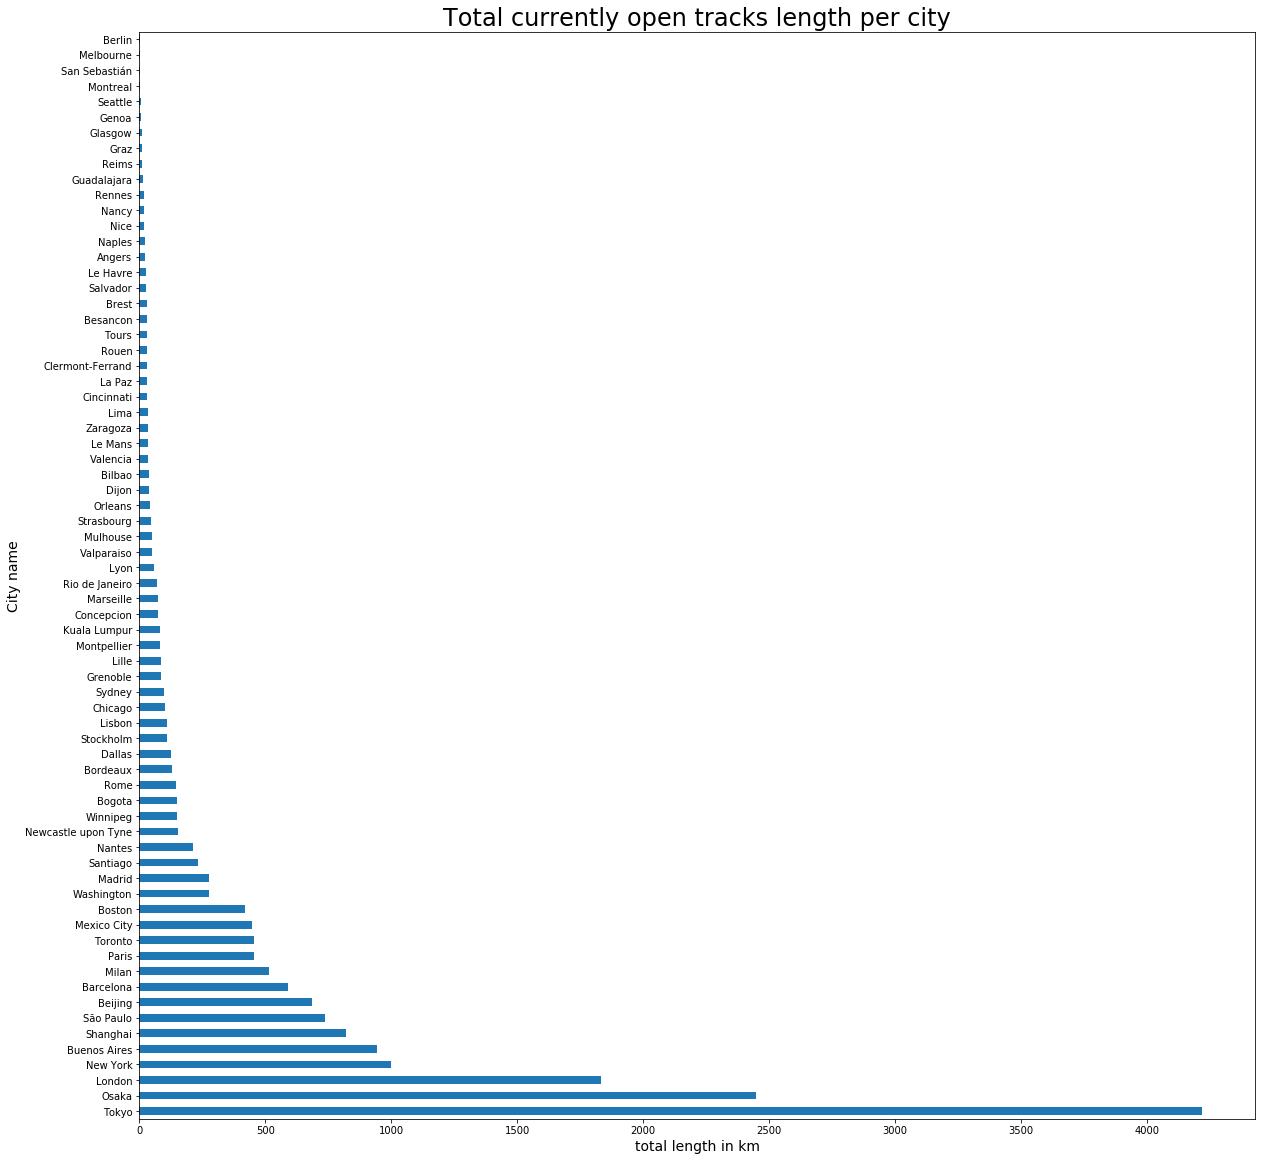

In [7]:
# add a column with city name to the tracks dataframe
city_tracks['city_name'] = city_tracks['city_id'].replace(city_names.set_index('id')['name'])
# all tracks - open and closed
tracks_incl_closed = city_tracks.loc[(city_tracks['opening'] != 0.0) & (city_tracks['opening'] <= 2019)]
# only tracks that are still open
tracks_excl_closed = city_tracks.loc[(city_tracks['opening'] != 0.0) & (city_tracks['opening'] <= 2019) & (city_tracks['closure'] >= 2019)]


def plot_total_track_lengths():
    total_lenght_per_city = (tracks_excl_closed.groupby(by='city_name')['length'].sum() / 1000).sort_values(ascending=False)
    plt.figure(figsize=(20,20)) 
    total_lenght_per_city.plot.barh()
    plt.title('Total currently open tracks length per city', fontsize=24)
    plt.xlabel('total length in km', fontsize=14)
    plt.ylabel('City name', fontsize=14)
    plt.show()
    
plot_total_track_lengths()

In [8]:
common_years = np.array([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
# get the city names that match from the two datasets
common_cities_length_population_names = np.intersect1d(city_population_1950_2020['Entity'].unique(), tracks_incl_closed['city_name'].unique(), assume_unique=True)

In order to calculate the correlation coefficients between track lenghts and population we need to have two arrays with equal number of observations. As the population dataset comes in 5 years' increments we need to have the same for the track lengths. We create an array with the cummulative summs of track lengths for each 5 years' period.

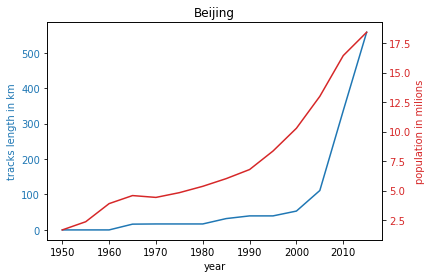

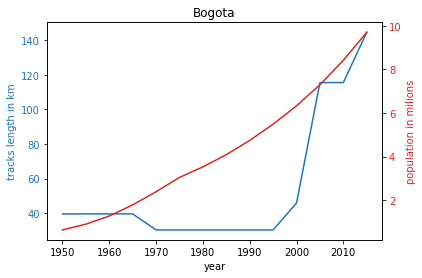

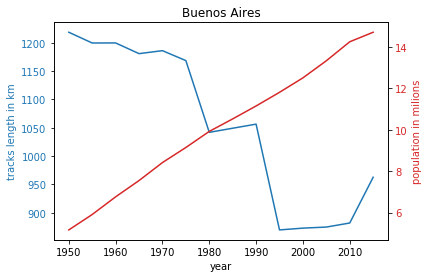

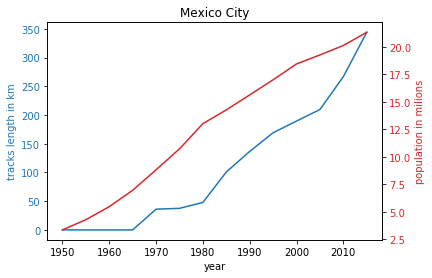

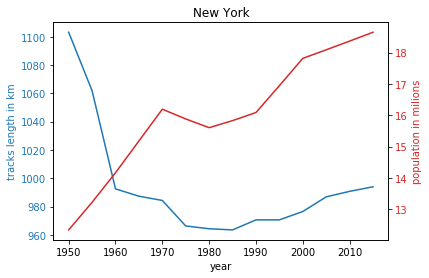

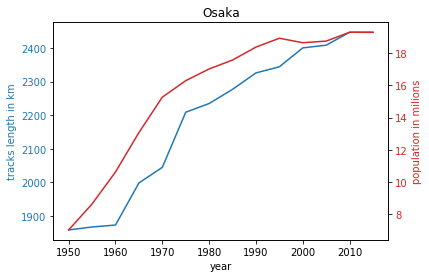

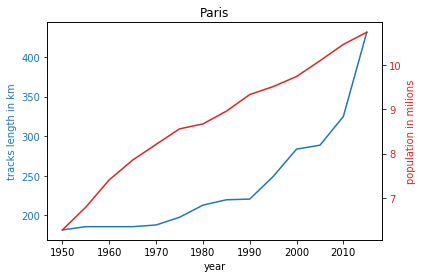

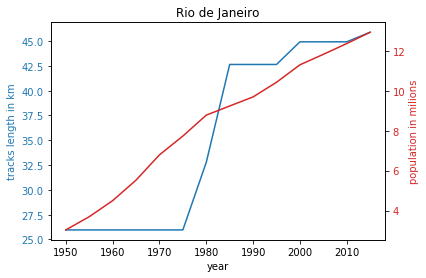

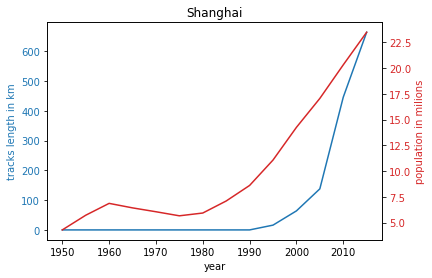

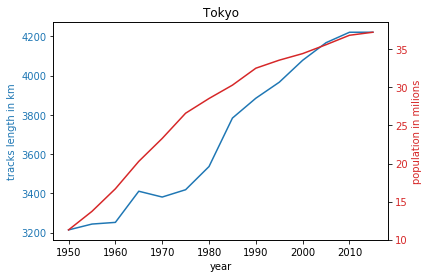

In [154]:
# returns a dataframe with year and length cols where the closed tracks are once added with the year when opened 
# and once added with the year of closure and negative length so we can represent the historical lenght correctly
def city_all_track_lengths(city):
    city_opened = tracks_incl_closed.loc[(tracks_incl_closed['city_name'] == city)]
    city_closed = tracks_incl_closed.loc[(tracks_incl_closed['city_name'] == city)].loc[tracks_incl_closed['closure'] <= 2015]
    city_all_opened = city_opened[['opening', 'length']]
    city_all_closed = city_closed[['closure', 'length']]
    city_all_closed['length'] = city_all_closed['length'].apply(lambda x: -x)
    
    city_all_opened.columns = ['year', 'length']
    city_all_closed.columns = ['year', 'length']
    
    return pd.merge(city_all_opened, city_all_closed,  how='outer')

# returns the sum of all lenghts(positive and negative) for a city and a given period (5 years in our case)
def sum_track_lengths(end_year, city, start_year=None):
    city_all_lengths = city_all_track_lengths(city)
    if start_year == None:
        return (city_all_lengths.loc[city_all_lengths['year'] <= end_year]['length']).sum()
    else: 
        return (city_all_lengths.loc[(city_all_lengths['year'] > start_year) & (city_all_lengths['year'] <= end_year)]['length']).sum()

# returns a Series with the cummulative sum of the track lengths in 5 years' increments for a given period (1950-2015 in our case)
def get_track_lengths_by_years(city, years):
    track_lengths = []
    for index, end_year in np.ndenumerate(years):
        start_year = None if index[0] == 0 else years[index[0]-1]
        track_lengths.append(sum_track_lengths(end_year, city, start_year))
    return pd.Series(np.array(track_lengths).cumsum()).astype('float64')

# returns a Series with the city populations in 5 years increments for a given period (1950-2015 in our case)
def get_population_by_years(city, years):
    end_year = years[-1]
    return pd.Series(np.array(city_population_1950_2020.loc[city_population_1950_2020['Entity'] == city]['City population'].loc[city_population_1950_2020['Year'] <= end_year]))

# plots the tracks lenght and population for a given city and period
def plot_track_length_population_by_years(city, years):
    population = get_population_by_years(city, years)
    track_lengths = get_track_lengths_by_years(city, years)
    
#     plt.plot(common_years, track_lengths / 1000)
#     plt.plot(common_years, population / 10000, c='red')
    
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_title(city)
    ax1.set_xlabel('year')
    ax1.set_ylabel('tracks length in km', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'

    
    ax1.plot(years, track_lengths /1000)
    ax2.plot(years, population / 1000000, c=color) 
    ax2.set_ylabel('population in milions', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
#     fig.legend(('track length in km', 'people in ten thousands'))
    
    plt.show()
        
def show_all_cities_by_year(cities, years):
    for city in cities:
        plot_track_length_population_by_years(city, years)
    
def plot_relative_length_population(cities, years):
    plt.figure(figsize=(20,20))
    corr_coefs = []
    for city in cities:
        population = get_population_by_years(city, years)
        track_lengths = get_track_lengths_by_years(city, years)
        corr_coefs.append(' - correlation coeff: ' + str(track_lengths.corr(population).round(4)))
        plt.plot(years, track_lengths/population*100)
    
    plt.title('Change in the relation between tracks length and population of cities (1950 - 2015)', fontsize=24)
    plt.xlabel('year', fontsize=14)
    plt.ylabel('tracks length / population ratio in %', fontsize=14)
    plt.legend(cities, prop={'size': 14})
    plt.show()
    
show_all_cities_by_year(common_cities_length_population_names, common_years)

For the purpose of better representation on a single plot I use two Y axes. On the plots above we can see that for 7 of the 10 cities with the increase of the population the tracks length also increases. For New York and Buenos Aires it shows tracks length decrease in the early years and then slight increase and for Rio de Janeiro the total length is very small. This may be due to unsufficient or incorrect data in the dataset(looking up on google shows 691 mi (1,112 km)track length for New York City Subway system which is close). Looking at the correlation coefficients bellow we can see that the strongest correlation is for Osaka and Tokio which probably comes to prove once again the supperiority of the Japanese city planners over the rest of the world as in many other areas.

The plots bellow represent the relative change of the tracks length and population over the years

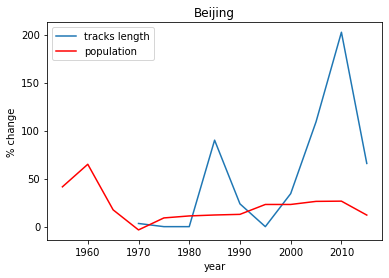

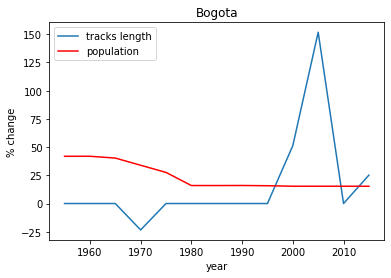

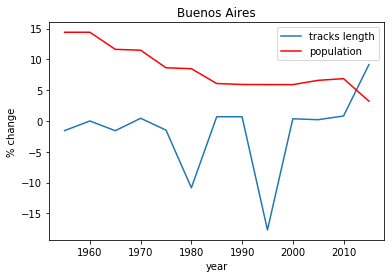

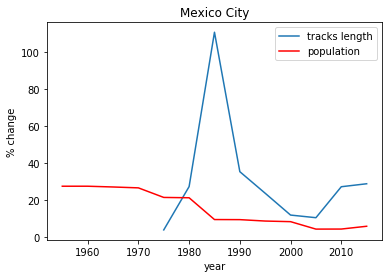

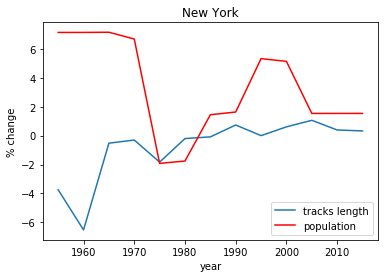

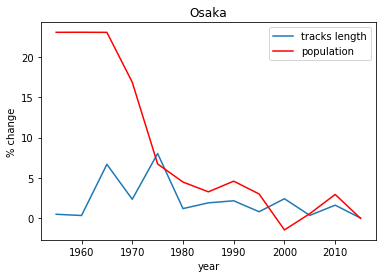

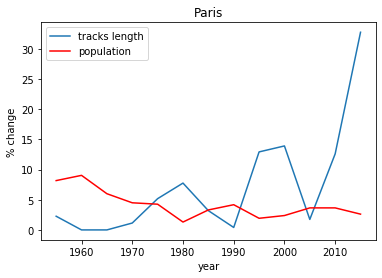

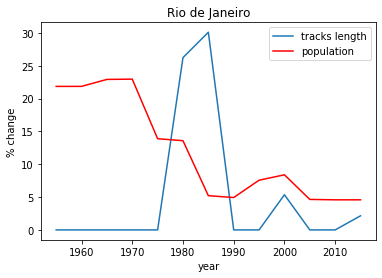

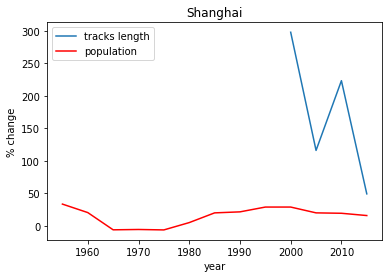

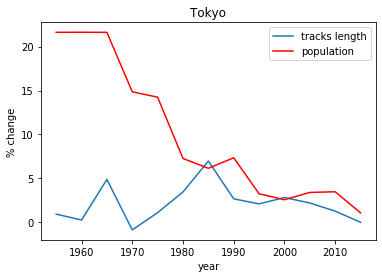

In [155]:
def plot_track_length_population_by_years_relative(city, years):
    population = get_population_by_years(city, years)
    track_lengths = get_track_lengths_by_years(city, years)
    
    population_percent_change = population.pct_change()*100
    track_lengths_percent_change = track_lengths.pct_change()*100
    
    plt.plot(common_years, track_lengths_percent_change)
    plt.plot(common_years, population_percent_change, c='red')
    plt.title(city)
    
    plt.xlabel('year')
    plt.ylabel('% change')
    plt.legend(['tracks length', 'population'])
    
    plt.show()

def show_all_cities_by_year_relative(cities, years):
    for city in cities:
        plot_track_length_population_by_years_relative(city, years)
    
show_all_cities_by_year_relative(common_cities_length_population_names, common_years)

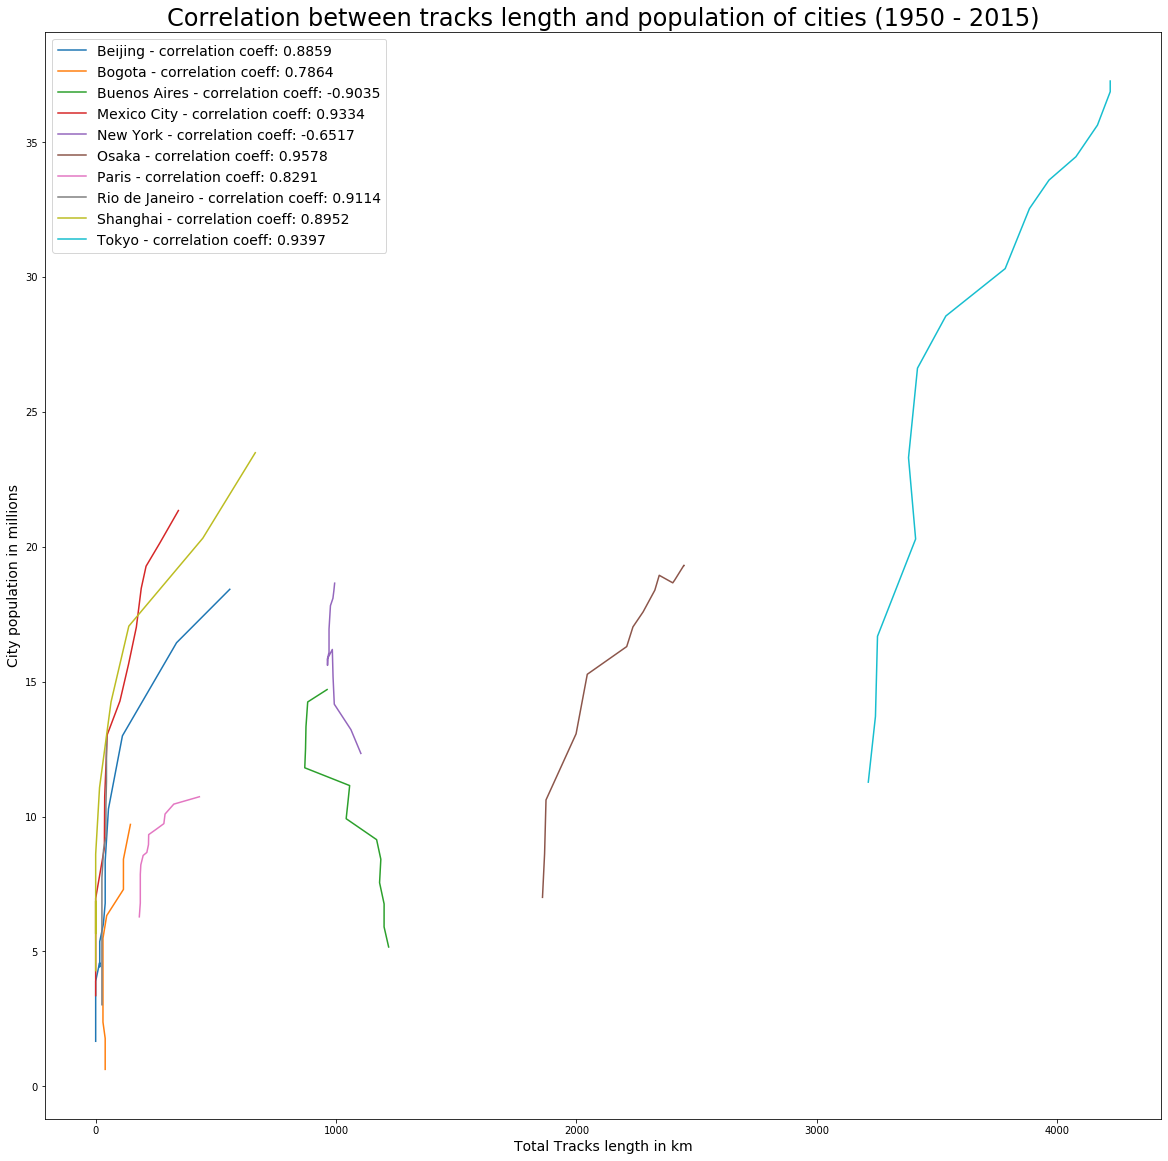

In [156]:
# calculates the correlation coefficients for the given period for each city and plots the correlations on a single graphic
def plot_correlation_length_population(cities, years):
    plt.figure(figsize=(20,20))
    corr_coefs = []
    for city in cities:
        population = get_population_by_years(city, years) / 1000000
        track_lengths = get_track_lengths_by_years(city, years) / 1000
        corr_coefs.append(' - correlation coeff: ' + str(track_lengths.corr(population).round(4)))
        plt.plot(track_lengths, population)
    
    plt.title('Correlation between tracks length and population of cities (1950 - 2015)', fontsize=24)
    plt.xlabel('Total Tracks length in km', fontsize=14)
    plt.ylabel('City population in millions', fontsize=14)
    plt.legend([i + j for i, j in zip(cities, corr_coefs)], prop={'size': 14})
    plt.show()

plot_correlation_length_population(common_cities_length_population_names, common_years)

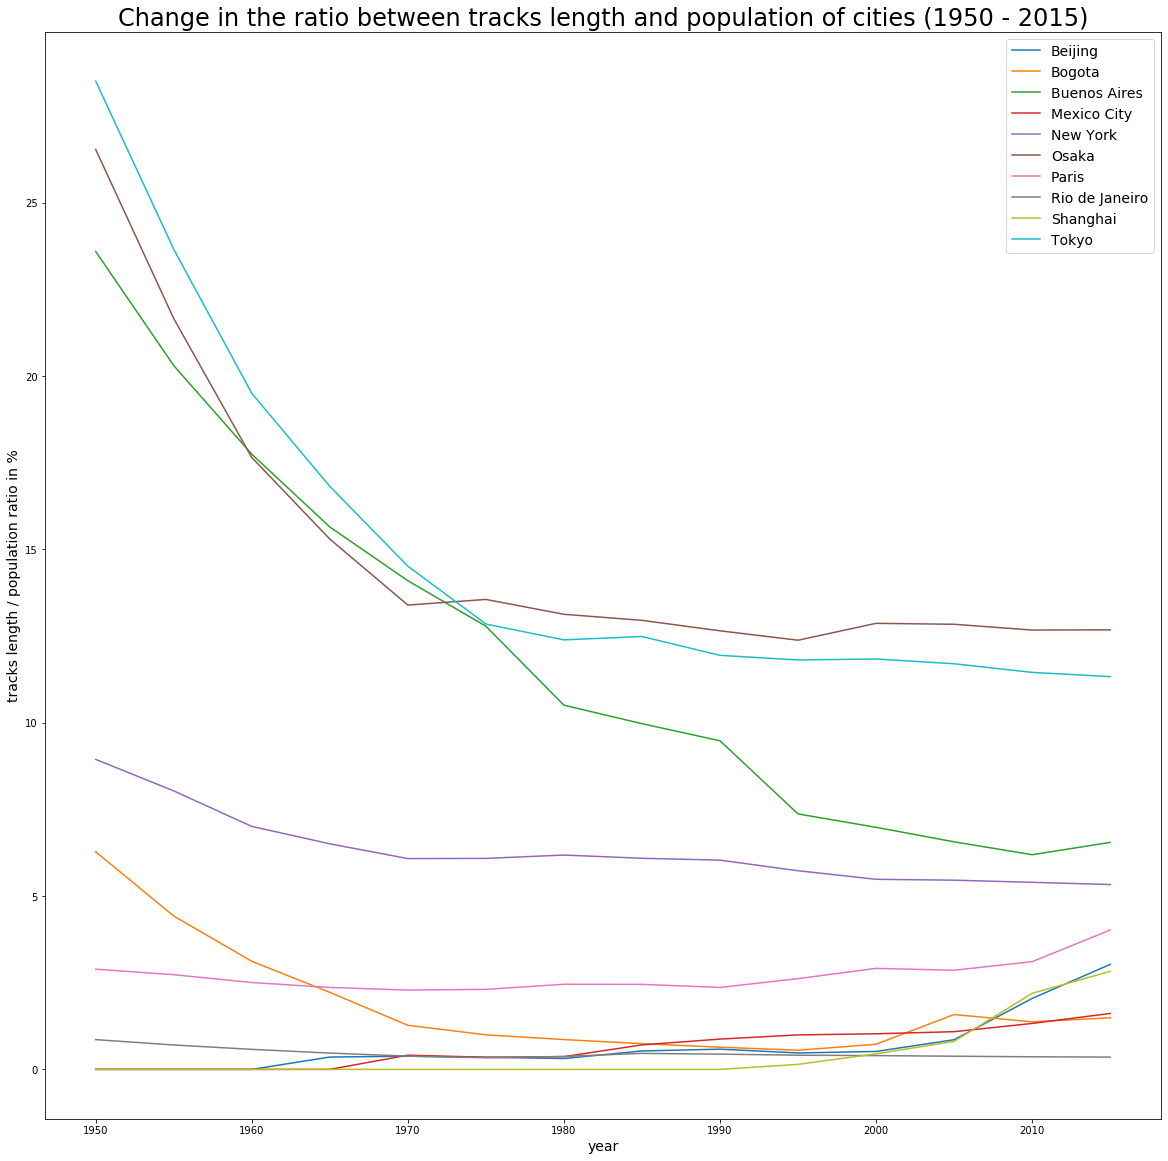

In [157]:
def plot_relative_length_population(cities, years):
    plt.figure(figsize=(20,20))
    corr_coefs = []
    for city in cities:
        population = get_population_by_years(city, years)
        track_lengths = get_track_lengths_by_years(city, years)
        corr_coefs.append(' - correlation coeff: ' + str(track_lengths.corr(population).round(4)))
        plt.plot(years, track_lengths/population*100)
    
    plt.title('Change in the ratio between tracks length and population of cities (1950 - 2015)', fontsize=24)
    plt.xlabel('year', fontsize=14)
    plt.ylabel('tracks length / population ratio in %', fontsize=14)
    plt.legend(cities, prop={'size': 14})
    plt.show()

plot_relative_length_population(common_cities_length_population_names, common_years)

The above graph shows the ratio of tracks length to population from 1950 to 2015. It can be seen that population growth has been much higher than the increase of tracks built. This could relate to faster population growth compared to metropilan area expansion, hence increase in population density over time.

## Correlation between the current population of a city and its metropolitan area

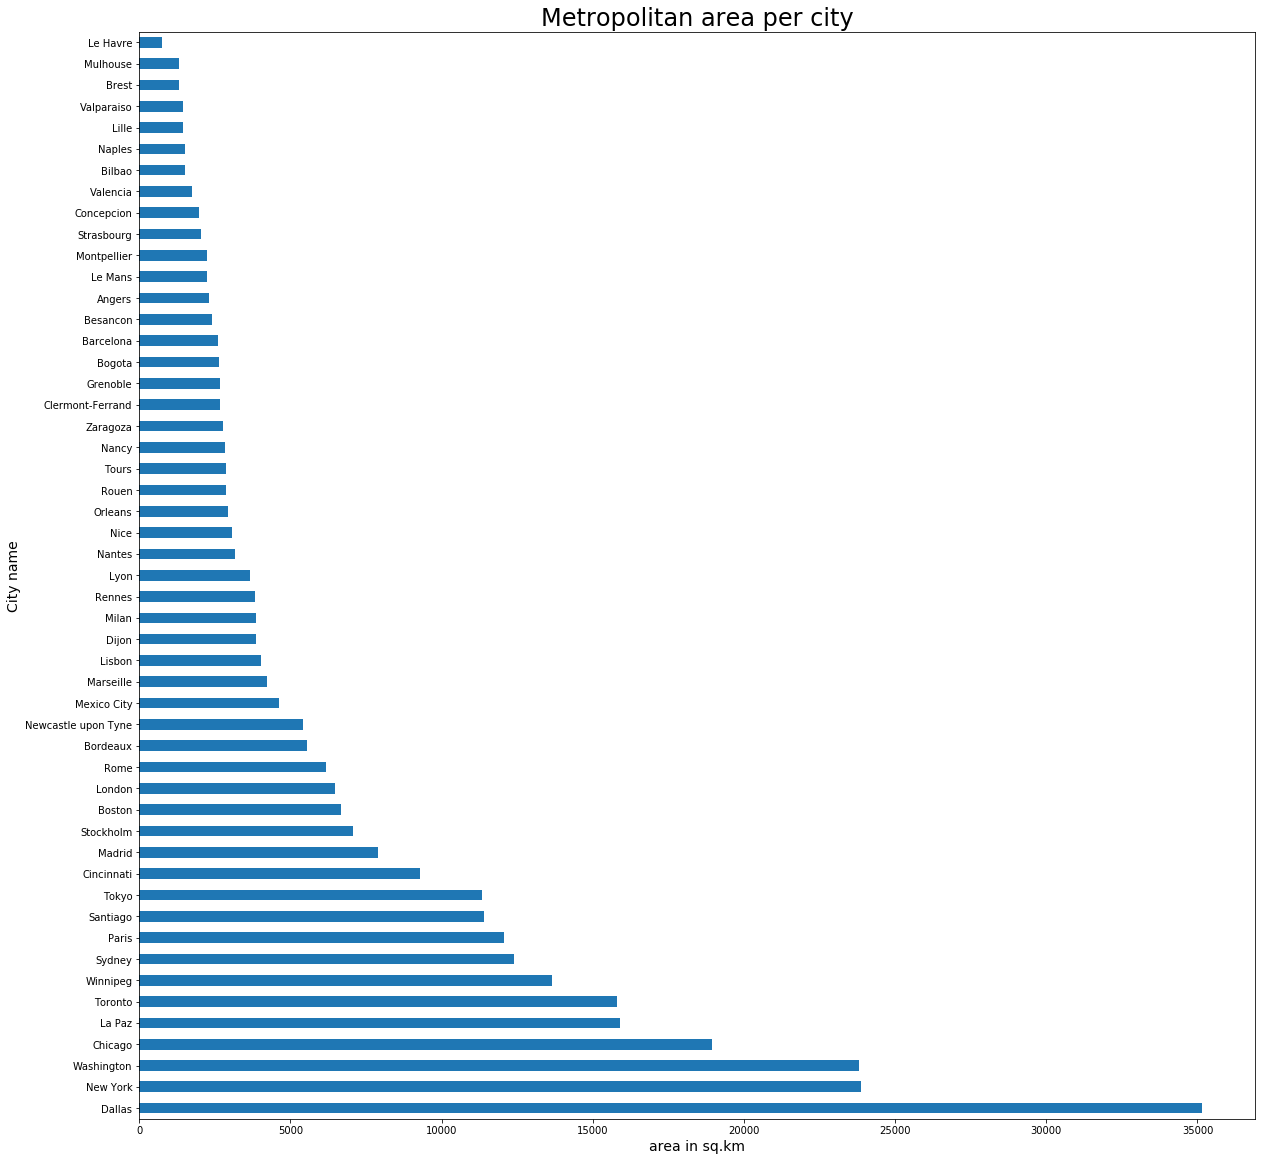

Correlation coefficient(Pearson): 0.20192142597010462
Correlation coefficient(Spearman): 0.4653393665158371


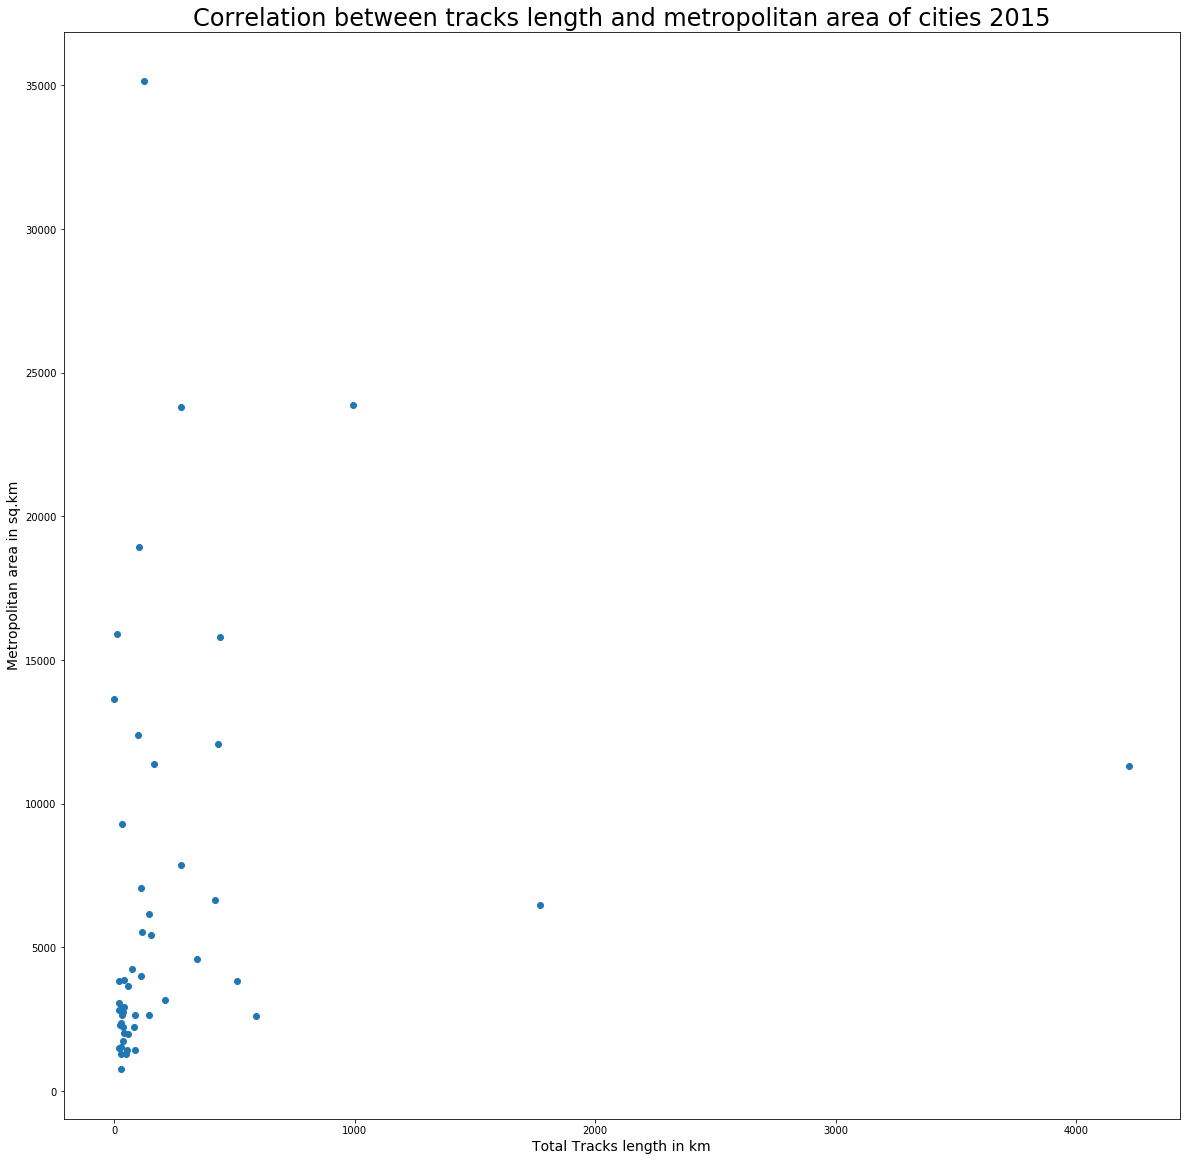

Correlation coefficient(Pearson): 0.20192142597010462
Correlation coefficient(Spearman): 0.4653393665158371


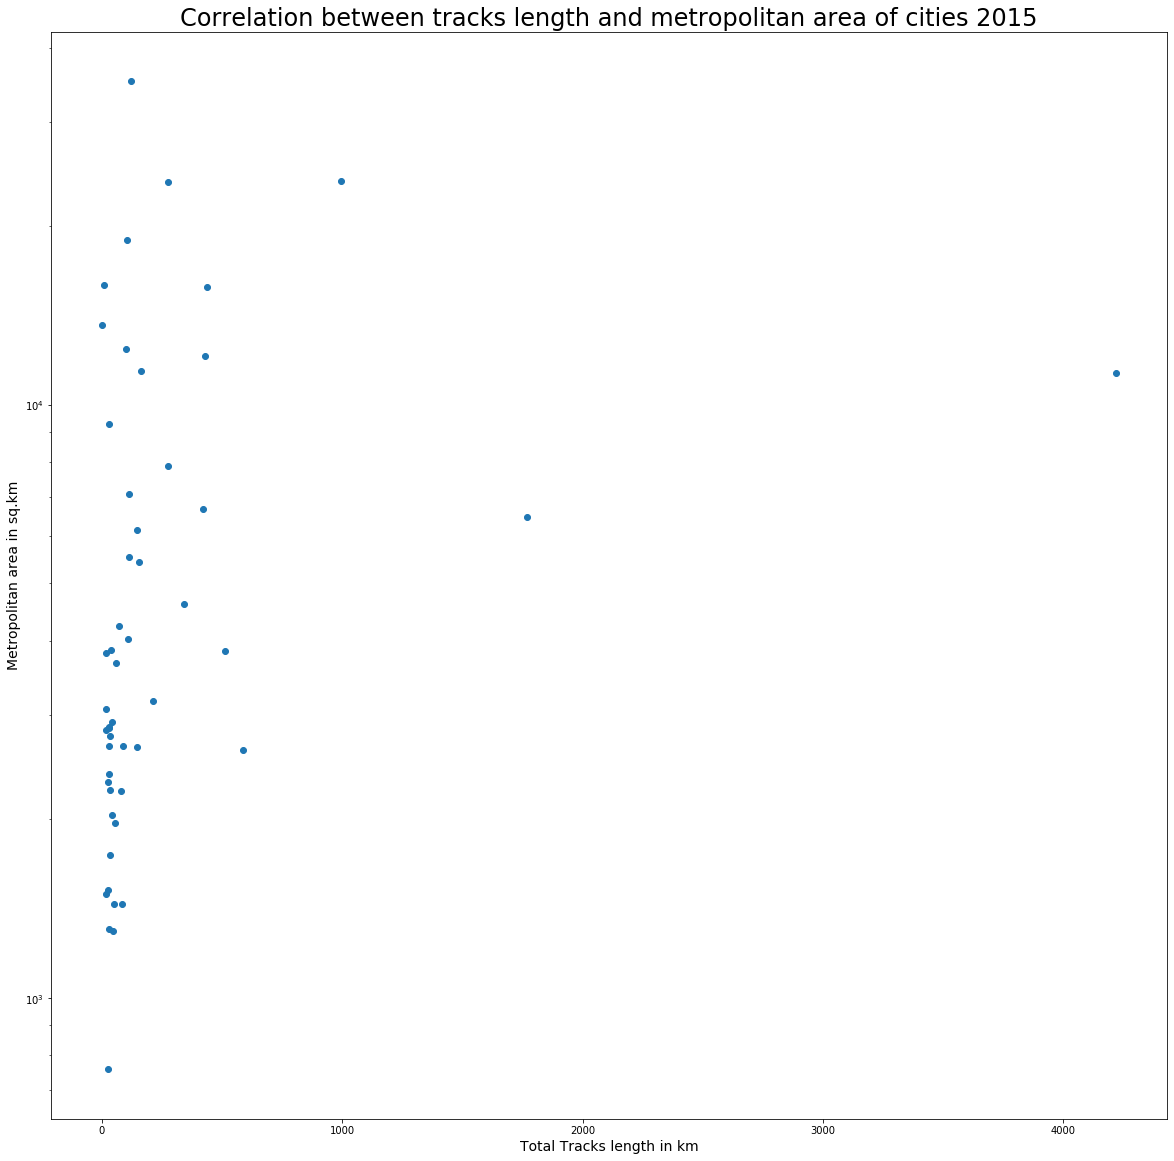

In [158]:
cities_area = pd.read_csv('Datasets/CITIES_area.csv', sep=';')
# get the metropolitan area only
cities_area = cities_area.loc[cities_area['VAR'] == 'AREA_FUA'].sort_values(by='Metropolitan areas')

# get the names of the track length cities (excluding n cities with shortest lengths)
track_length_city_names = (tracks_excl_closed.groupby(by='city_name')['length'].sum()).sort_values(ascending=False)[0:60].keys()
# get the common cities from both datasets
common_cities_area_length_names = np.intersect1d(cities_area['Metropolitan areas'].unique(), track_length_city_names, assume_unique=True)
# filter only the cities we need from cities area
cities_area = cities_area.loc[cities_area['Metropolitan areas'].isin(common_cities_area_length_names)]

# print(cities_area.loc[cities_area['Year'] == 2014][['Metropolitan areas','Value']])
# print(common_cities_area_length_names.size)
# print(cities_area.loc[cities_area['Year'] == 2015]['Metropolitan areas'].unique().size)

# take only city name and area value columns for year 2015 (this is the last year that all cities have in common)
cities_area = cities_area[['Metropolitan areas', 'Value', 'Year']]
# convert to float as it is a string
cities_area['Value'] = cities_area['Value'].astype('float64')


def plot_correlation_length_area_log(cities, year):
    plt.figure(figsize=(20,20))
    current_year_areas = cities_area.loc[cities_area['Year'] == year]['Value']
    current_tracks_lengths = []
    for index, city in enumerate(cities):
        city_length = np.float64(sum_track_lengths(year, city) / 1000)
        current_tracks_lengths.append(city_length)
    
    plt.scatter(current_tracks_lengths, current_year_areas)
    plt.title('Correlation between tracks length and metropolitan area of cities 2015', fontsize=24)
    plt.yscale('log')
    plt.xlabel('Total Tracks length in km', fontsize=14)
    plt.ylabel('Metropolitan area in sq.km', fontsize=14)
    
    print('Correlation coefficient(Pearson): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_tracks_lengths)))))
    print('Correlation coefficient(Spearman): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_tracks_lengths)), method='spearman')))

#     plt.legend([i + str(': ' + str(j) + 'sq.km - ') + (str(k) + 'km') for i, j, k in zip(cities, current_year_areas, current_tracks_lengths)], prop={'size': 14}, loc=1, ncol=2)

    plt.show()
    
def plot_correlation_length_area_linear(cities, year):
    plt.figure(figsize=(20,20))
    current_year_areas = cities_area.loc[cities_area['Year'] == year]['Value']
    current_tracks_lengths = []
    for index, city in enumerate(cities):
        city_length = np.float64(sum_track_lengths(year, city) / 1000)
        current_tracks_lengths.append(city_length)
    
    plt.scatter(current_tracks_lengths, current_year_areas)
    plt.title('Correlation between tracks length and metropolitan area of cities 2015', fontsize=24)
    plt.xlabel('Total Tracks length in km', fontsize=14)
    plt.ylabel('Metropolitan area in sq.km', fontsize=14)
    
    print('Correlation coefficient(Pearson): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_tracks_lengths)))))
    print('Correlation coefficient(Spearman): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_tracks_lengths)), method='spearman')))

#     plt.legend([i + str(': ' + str(j) + 'sq.km - ') + (str(k) + 'km') for i, j, k in zip(cities, current_year_areas, current_tracks_lengths)], prop={'size': 14}, loc=1, ncol=2)

    plt.show()

def plot_cities_area(year):
    plt.figure(figsize=(20,20))
    current_year_areas = cities_area.loc[cities_area['Year'] == year].sort_values(by='Value',ascending=False)
    current_year_areas['Value'].plot.barh()
    plt.title('Metropolitan area per city', fontsize=24)
    plt.xlabel('area in sq.km', fontsize=14)
    plt.ylabel('City name', fontsize=14)
    plt.yticks(np.arange(current_year_areas['Metropolitan areas'].size), current_year_areas['Metropolitan areas'])
    plt.show()

plot_cities_area(2015)
plot_correlation_length_area_linear(common_cities_area_length_names, 2015)
plot_correlation_length_area_log(common_cities_area_length_names, 2015)

We can see that the correlation coefficient is small which should show that most of the cities don't have well developed railway systems. As Dalas for example - it is the city with biggest area and still it has only around 122km of tracks length. As the dataset contains information about different types of city area we can try and see if there is a higher correlation by changing the 'VAR' value and years in the function parameters. The highest we can get is with AREA_FUA (Metropolitan area total land area).

## Correlation between the population and area variables

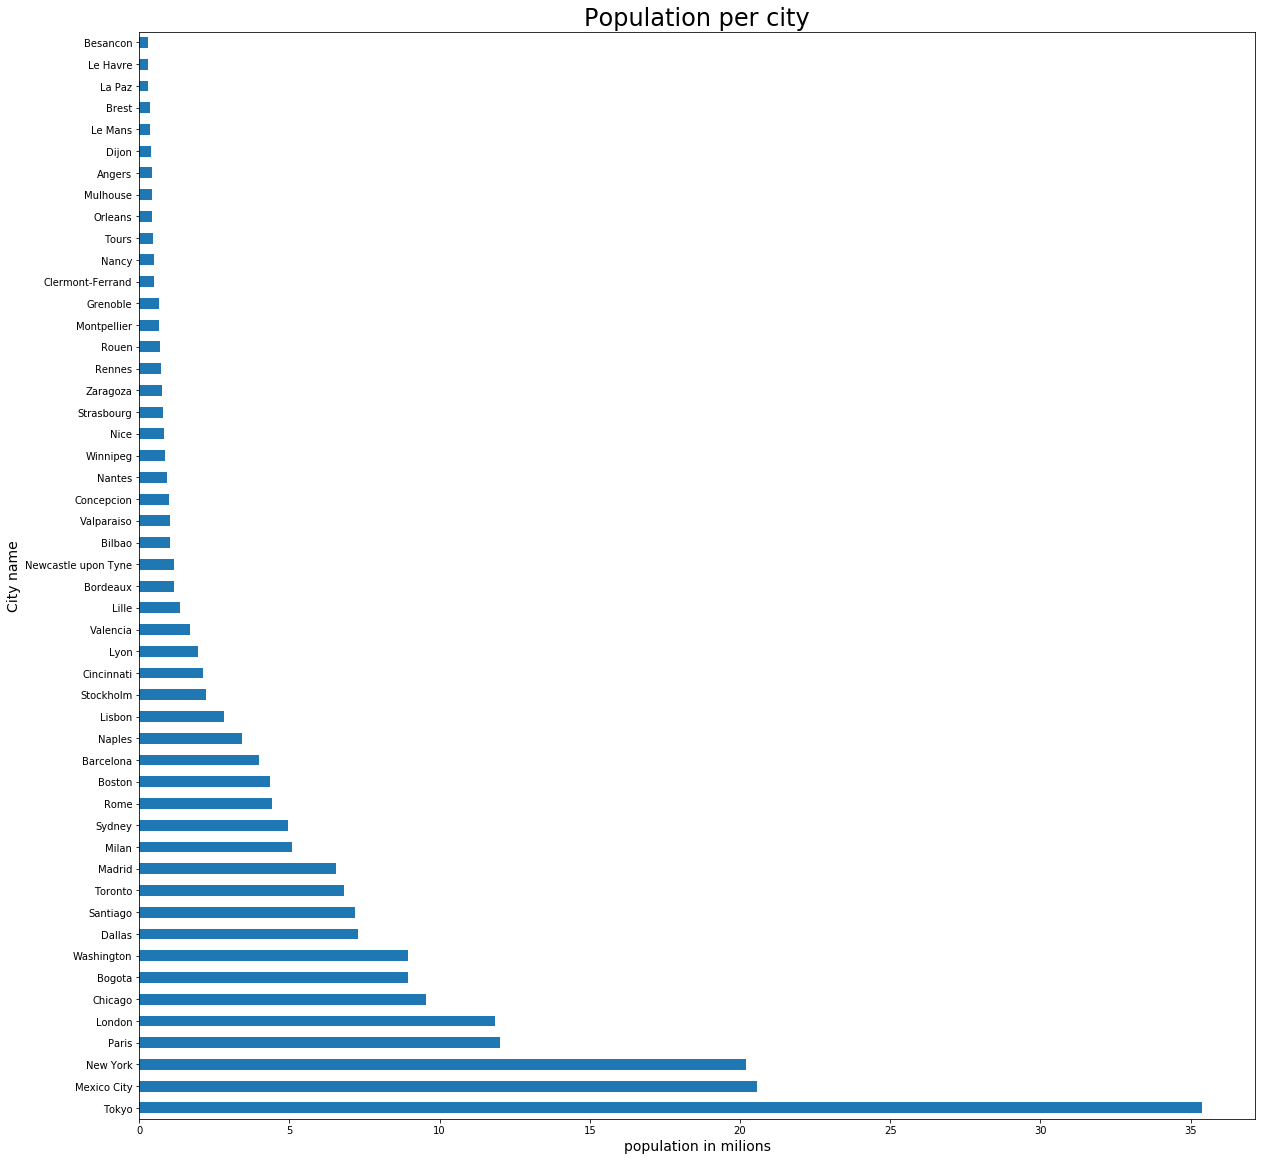

Correlation coefficient(Pearson): 0.44674600483492644
Correlation coefficient(Spearman): 0.5860744297719087


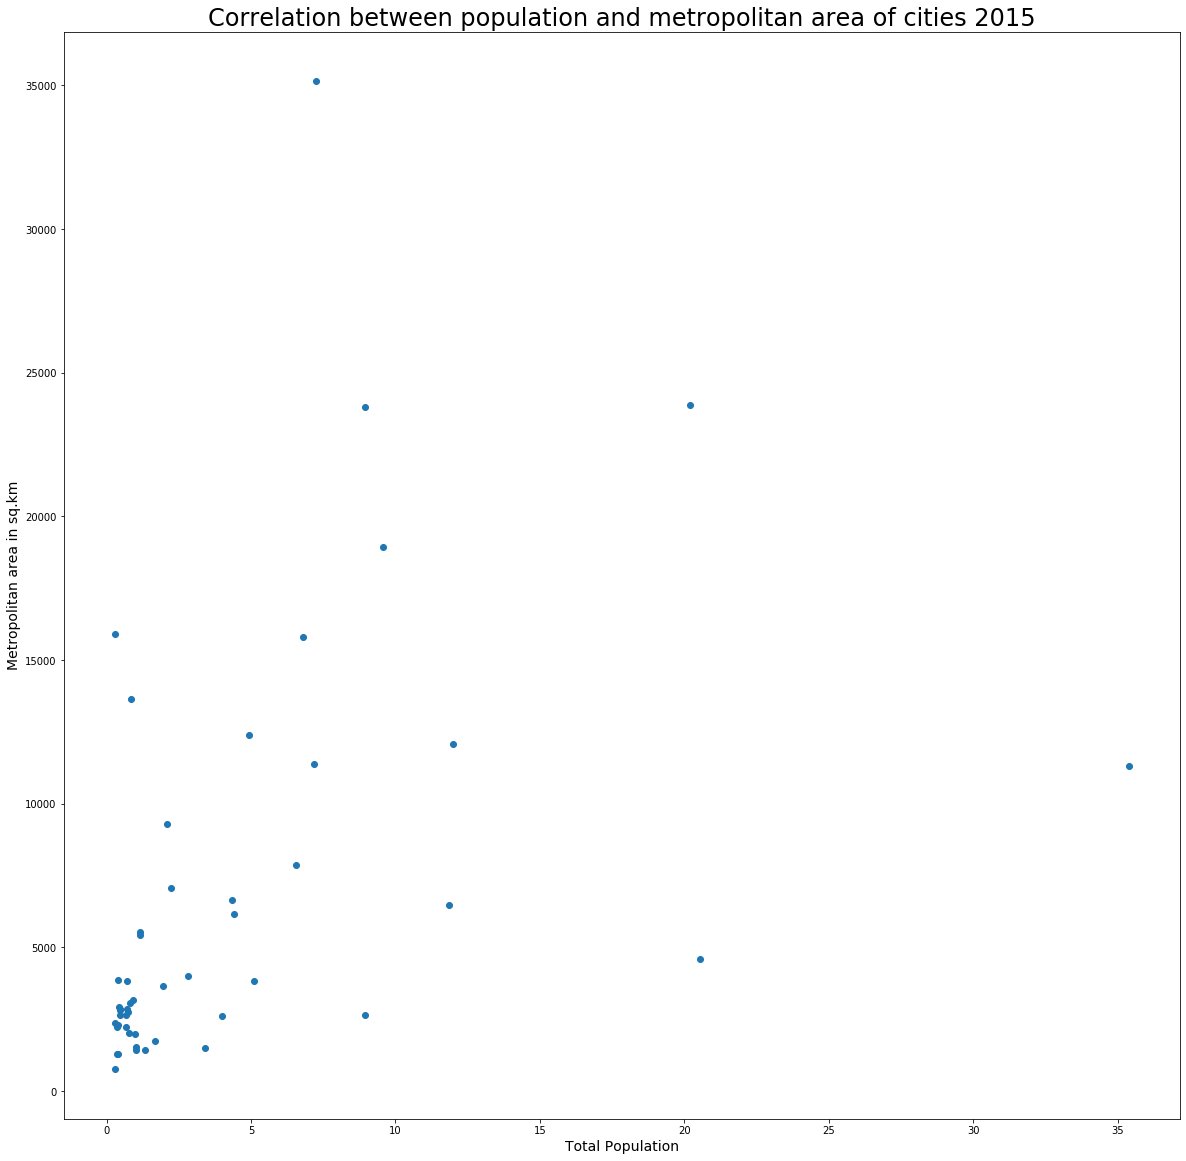

Correlation coefficient(Pearson): 0.44674600483492644
Correlation coefficient(Spearman): 0.5860744297719087


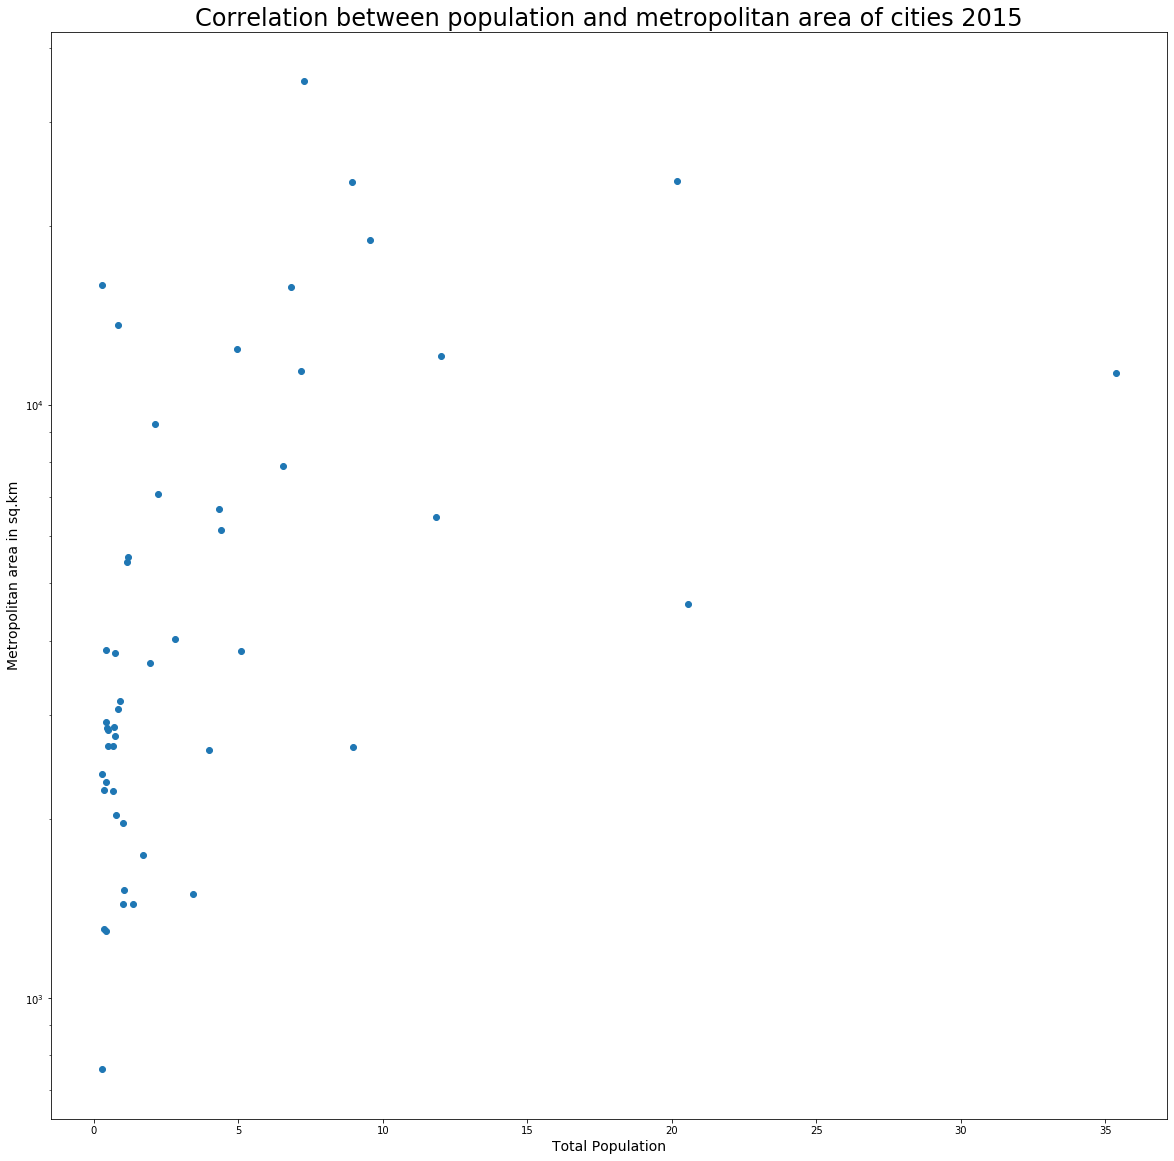

In [151]:
cities_population = pd.read_csv('Datasets/CITIES_density.csv', sep=';')

# get the population number only
cities_population = cities_population.loc[cities_population['VAR'] == 'T_T'].sort_values(by='Metropolitan areas')

# convert to float as the values are strings
cities_population['Value'] = cities_population['Value'].astype('float64')
cities_population['Year'] = cities_population['Year'].astype('float64')

# get the common cities from both datasets
common_cities_area_population_names = np.intersect1d(cities_population.loc[cities_population['Year'] == 2015]['Metropolitan areas'].unique(), common_cities_area_length_names, assume_unique=True)

# filter only the cities we need from cities population
cities_population = cities_population.loc[cities_population['Metropolitan areas'].isin(common_cities_area_length_names)]

# take only city name and area value columns
cities_population = cities_population[['Metropolitan areas', 'Flag Codes', 'Year']]
# change column name for clarity
cities_population.rename(columns = {'Flag Codes': 'Value'}, inplace=True)

def plot_correlation_population_area_linear(cities, year):
    plt.figure(figsize=(20,20))
    current_year_areas = cities_area.loc[cities_area['Metropolitan areas'].isin(cities)]
    current_year_areas = current_year_areas.loc[cities_area['Year'] == year]['Value']
    current_year_populations = cities_population.loc[cities_population['Year'] == year]['Value']
    
    plt.scatter((current_year_populations / 1000000), current_year_areas)
    plt.title('Correlation between population and metropolitan area of cities 2015', fontsize=24)
    plt.xlabel('Total Population', fontsize=14)
    plt.ylabel('Metropolitan area in sq.km', fontsize=14)
    
    print('Correlation coefficient(Pearson): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_year_populations)))))
    print('Correlation coefficient(Spearman): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_year_populations)), method='spearman')))

    plt.show()

def plot_correlation_population_area_log(cities, year):
    plt.figure(figsize=(20,20))
    current_year_areas = cities_area.loc[cities_area['Metropolitan areas'].isin(cities)]
    current_year_areas = current_year_areas.loc[cities_area['Year'] == year]['Value']
    current_year_populations = cities_population.loc[cities_population['Year'] == year]['Value']
    
    plt.scatter((current_year_populations  / 1000000), current_year_areas)
    plt.title('Correlation between population and metropolitan area of cities 2015', fontsize=24)
    plt.yscale('log')
    plt.xlabel('Total Population', fontsize=14)
    plt.ylabel('Metropolitan area in sq.km', fontsize=14)
    
    print('Correlation coefficient(Pearson): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_year_populations)))))
    print('Correlation coefficient(Spearman): ' + str(pd.Series(np.array(current_year_areas)).corr(pd.Series(np.array(current_year_populations)), method='spearman')))

    plt.show()

def plot_cities_population(year):
    plt.figure(figsize=(20,20))
    current_year_populations = cities_population.loc[cities_population['Year'] == year].sort_values(by='Value',ascending=False)

    (current_year_populations['Value'] / 1000000).plot.barh()
    plt.title('Population per city', fontsize=24)
    plt.xlabel('population in milions', fontsize=14)
    plt.ylabel('City name', fontsize=14)
    plt.yticks(np.arange(current_year_populations['Metropolitan areas'].size), current_year_populations['Metropolitan areas'])
    plt.show()

plot_cities_population(2015)
plot_correlation_population_area_linear(common_cities_area_population_names, 2015)
plot_correlation_population_area_log(common_cities_area_population_names, 2015)